In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from data_quality import *

In [2]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts2/*.csv')

In [3]:
flights_clean_completeness_ratio_df, flights_dirty_completeness_ratio_df = completeness_dataframes(clean_flights, dirty_flights)

In [4]:
fb_clean_completeness_ratio_df, fb_dirty_completeness_ratio_df = completeness_dataframes(clean_fb, dirty_fb)

In [5]:
flights_clean_distinct_counts_df, flights_dirty_distinct_counts_df = distinct_counts_dataframes(clean_flights, dirty_flights)

In [6]:
fb_clean_distinct_counts_df, fb_dirty_distinct_counts_df = distinct_counts_dataframes(clean_fb, dirty_fb)

In [8]:
for file in range(5):
    df = pd.read_csv(clean_fb[file])
    #total values in df
    total_count = df.shape[0]*df.shape[1]
    #get a total count for nans
    count_nan = len(df) - df.count()
    sum_nans = count_nan.sum()
    null_prevalence = sum_nans/total_count
    print(null_prevalence)

0.043478260869565216
0.04227405247813411
0.04212454212454213
0.07936507936507936
0.04241071428571429


### Plots - Metric Analysis

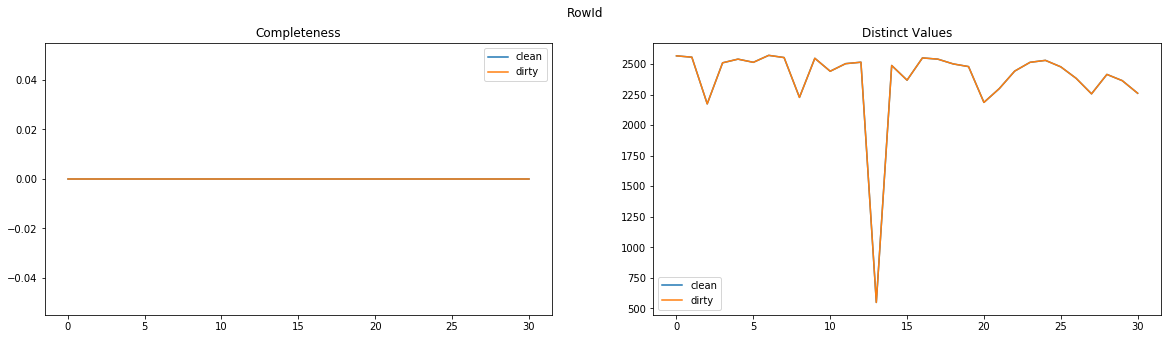

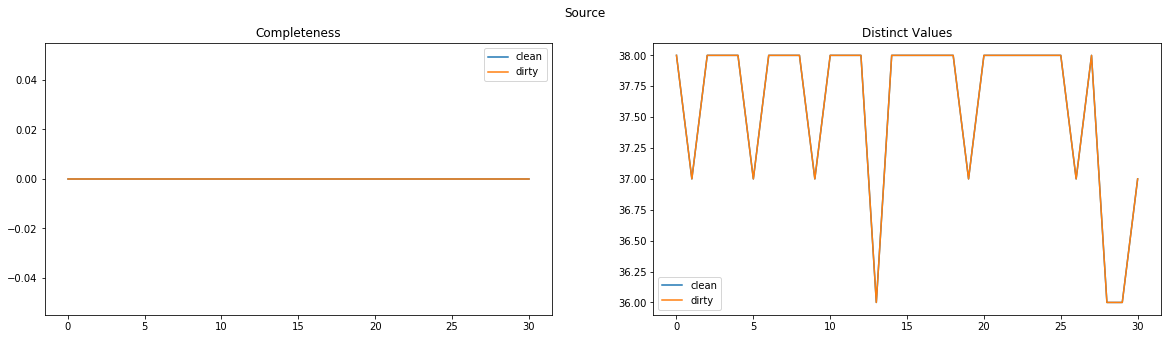

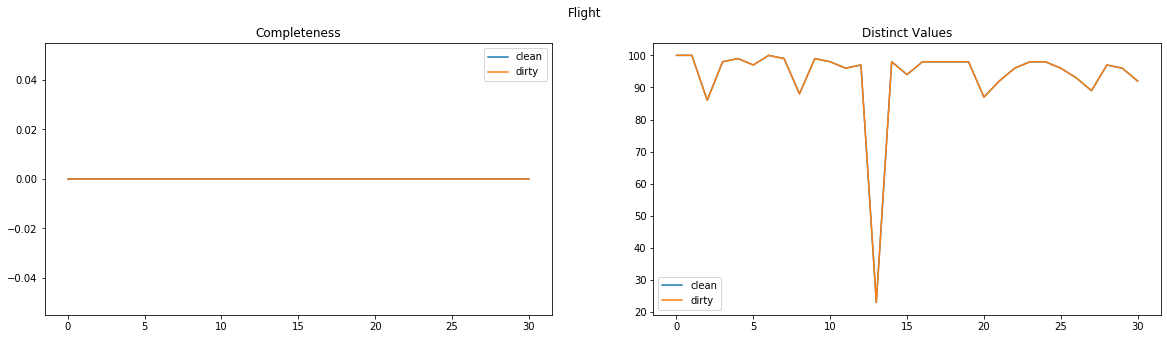

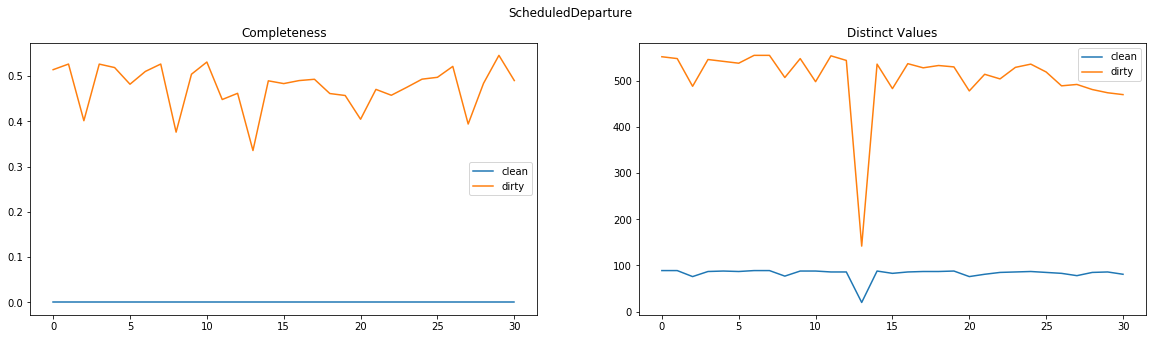

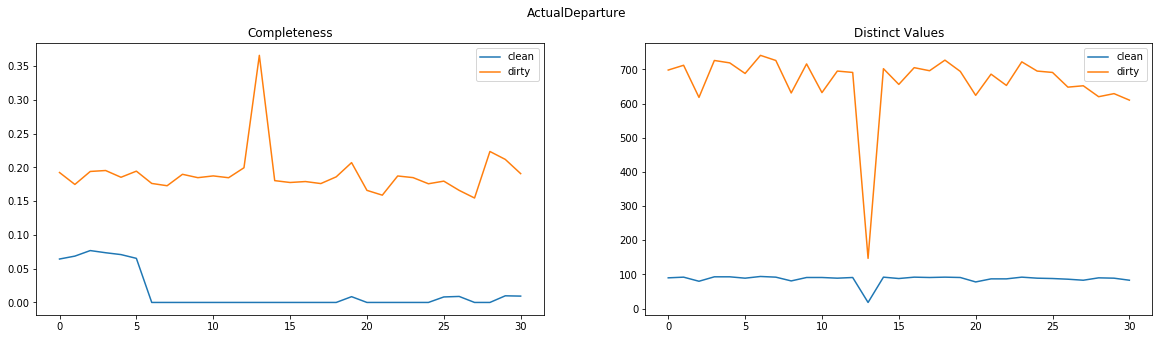

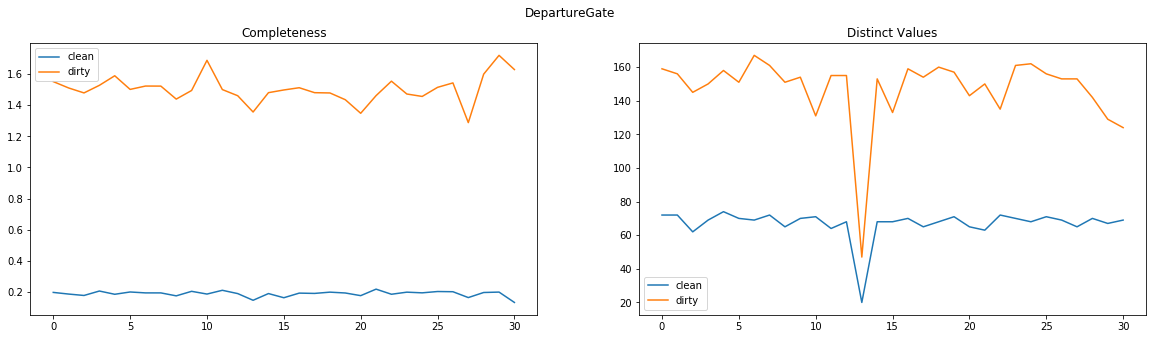

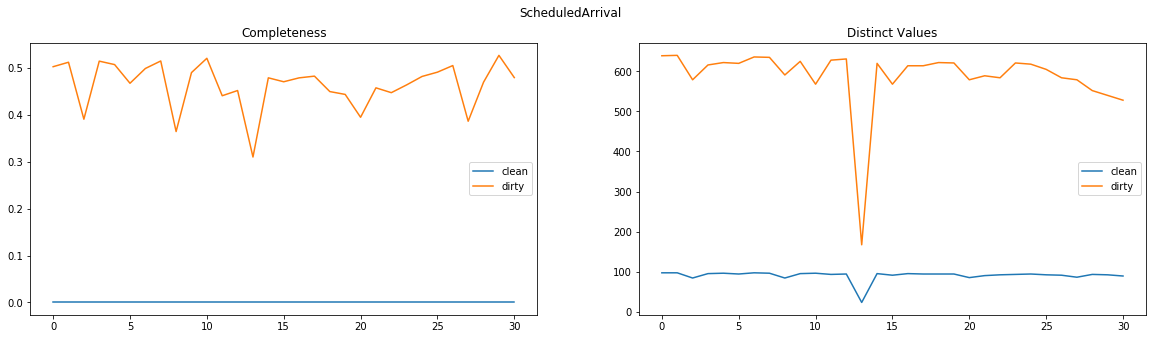

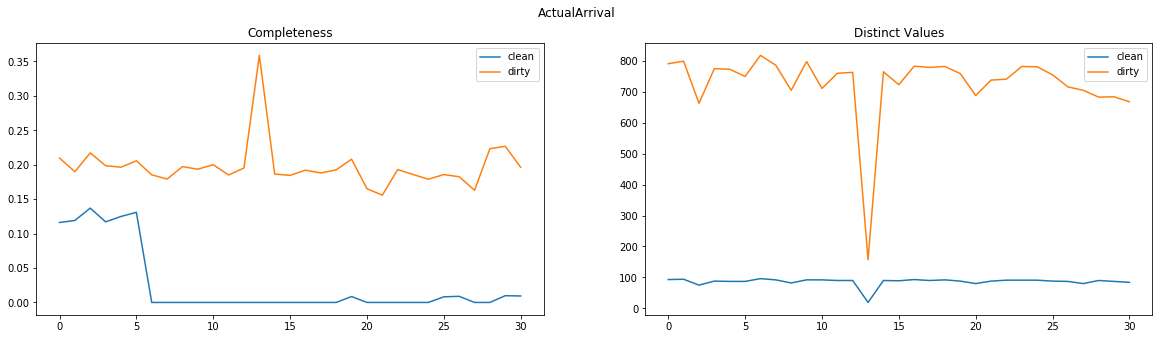

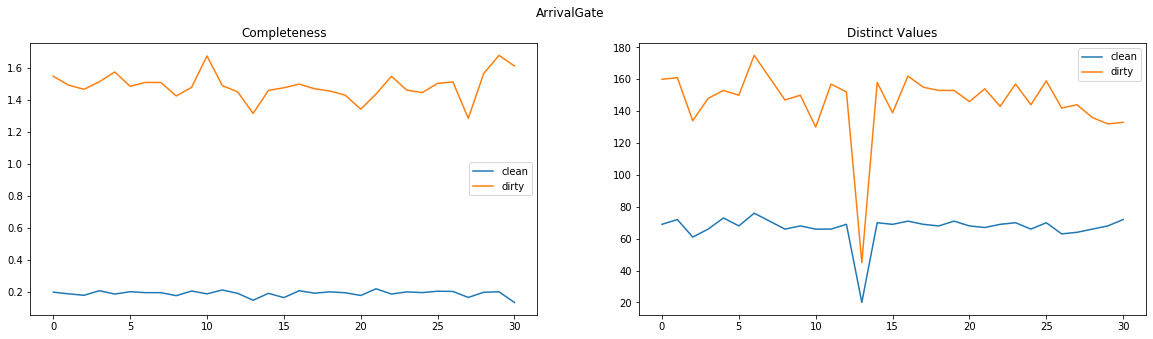

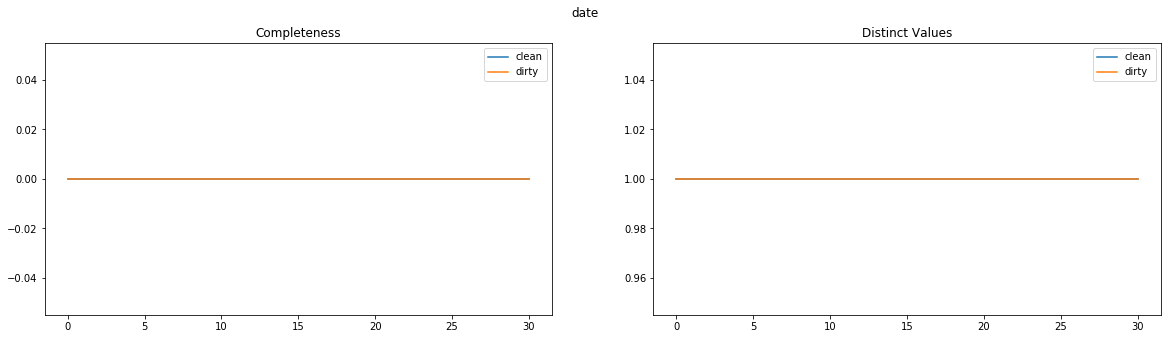

In [9]:
for column in flights_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(flights_clean_completeness_ratio_df.shape[1]), flights_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(flights_dirty_completeness_ratio_df.shape[1]), flights_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(flights_clean_distinct_counts_df.shape[1]), flights_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(flights_dirty_distinct_counts_df.shape[1]), flights_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

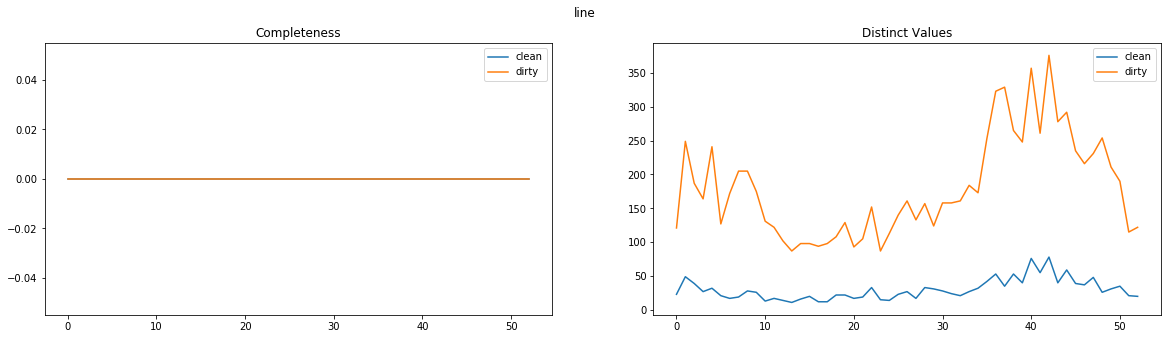

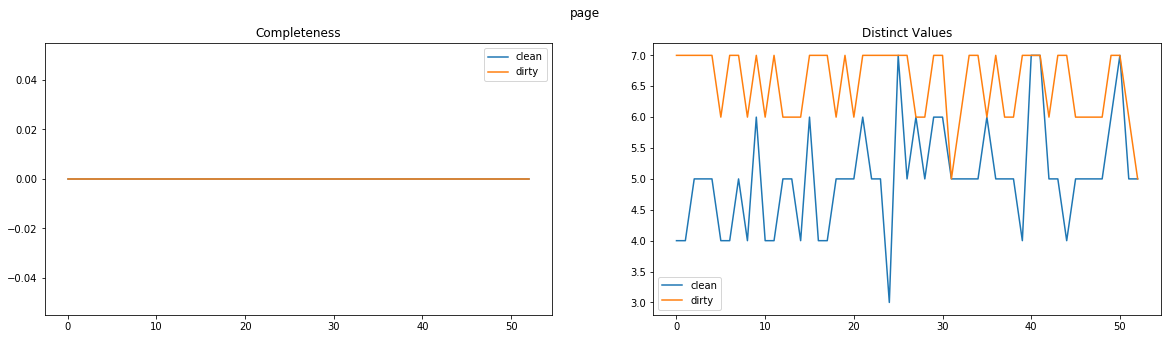

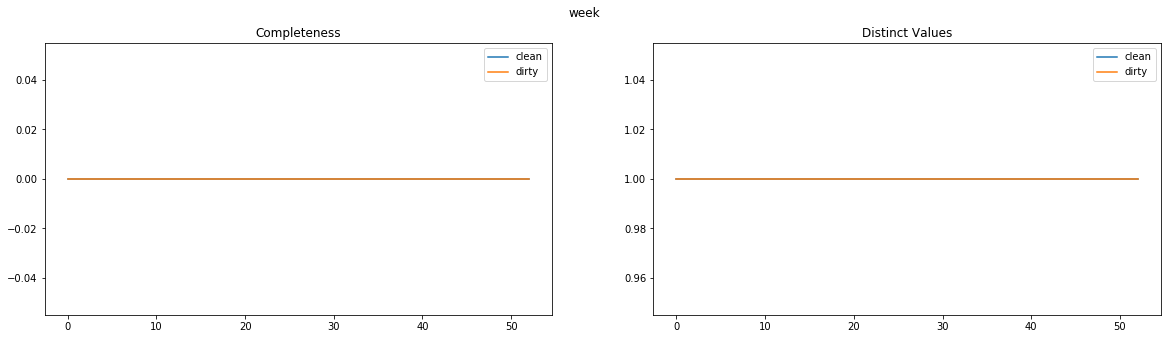

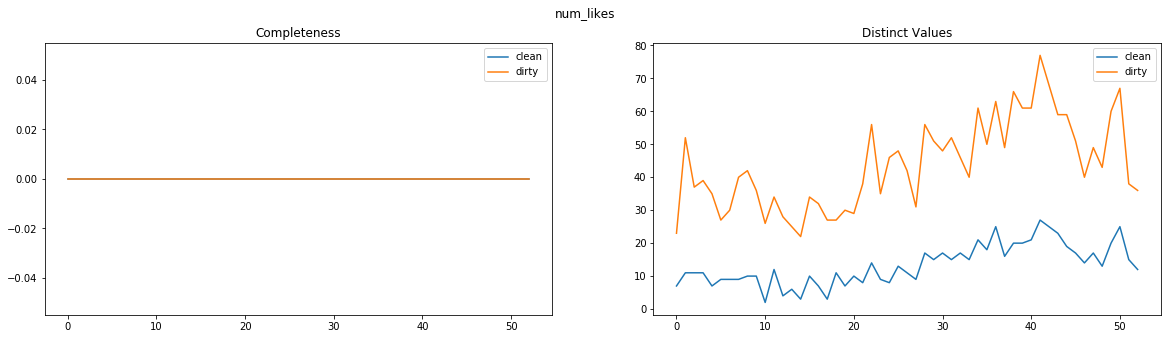

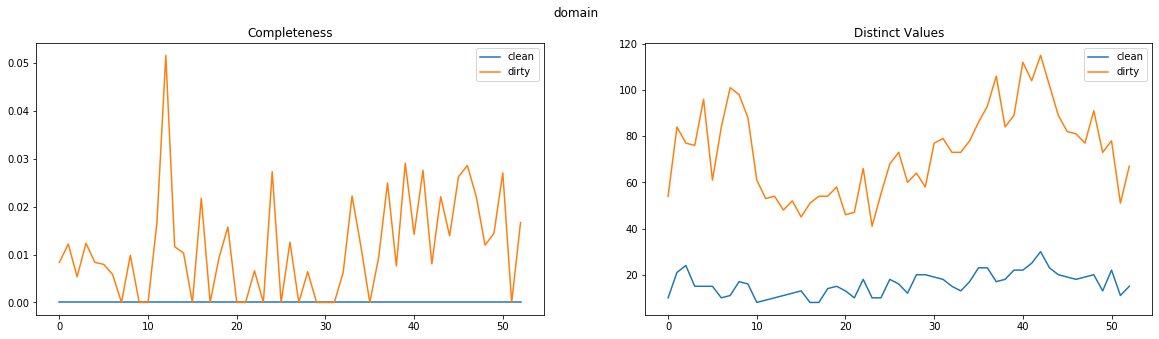

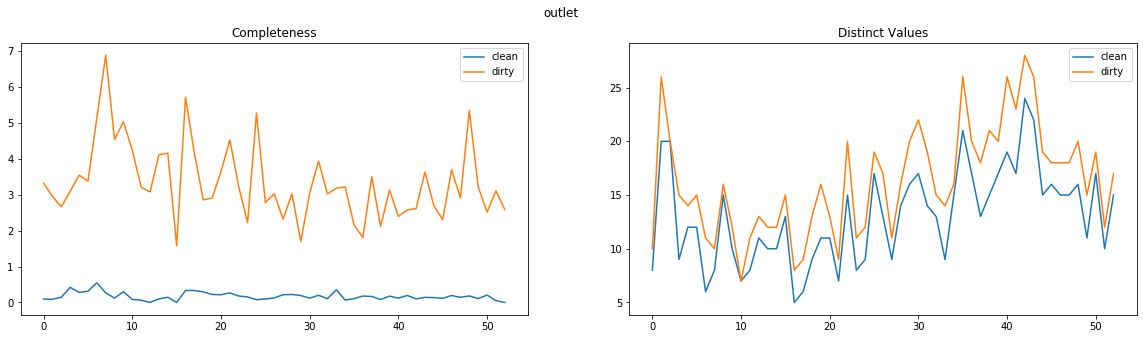

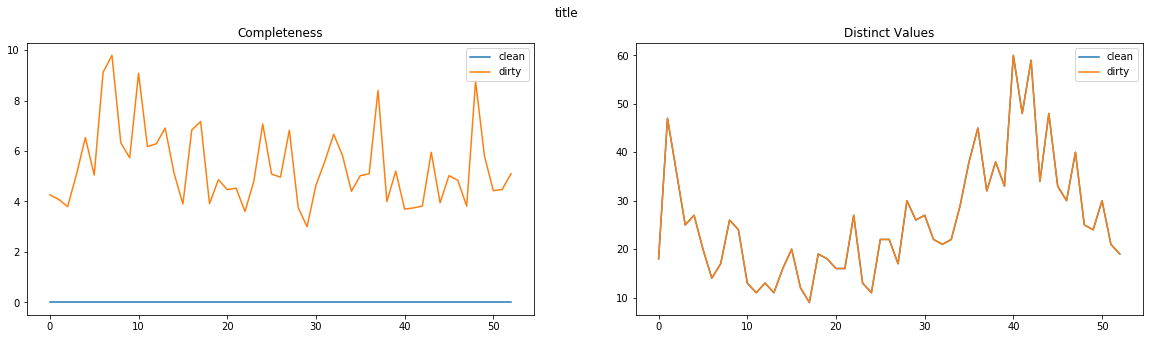

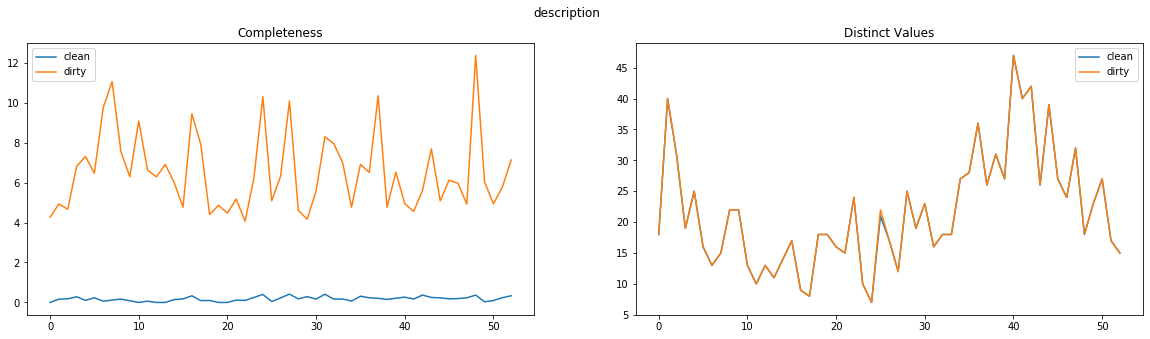

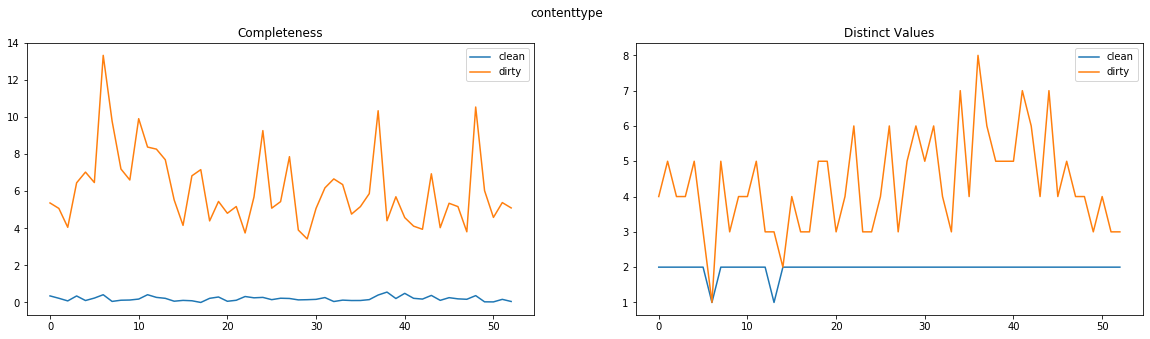

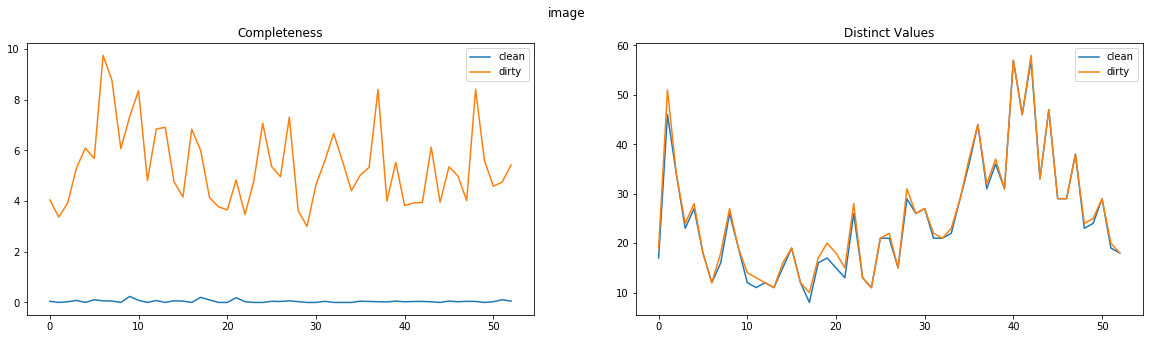

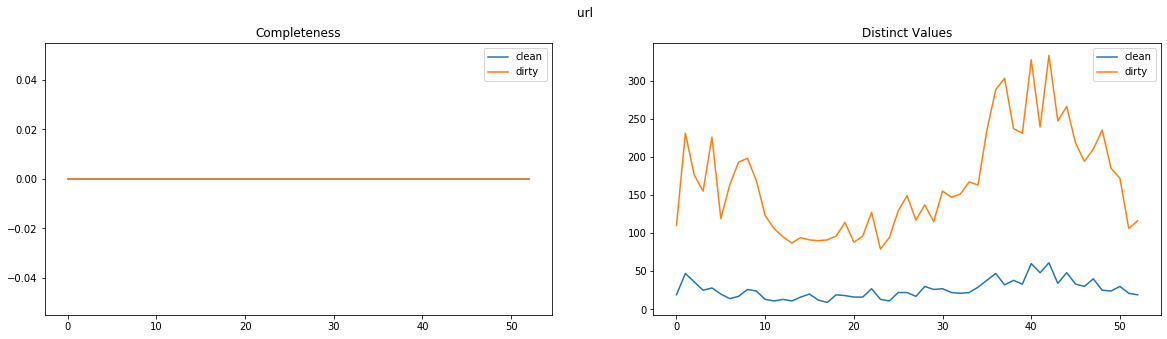

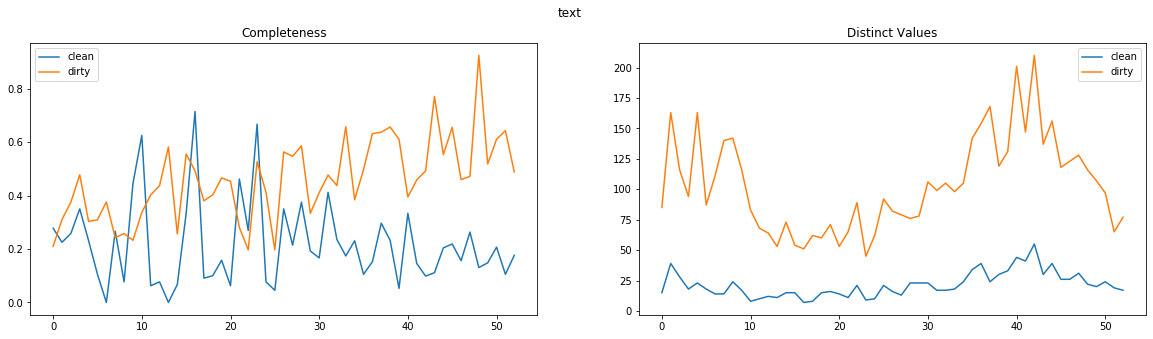

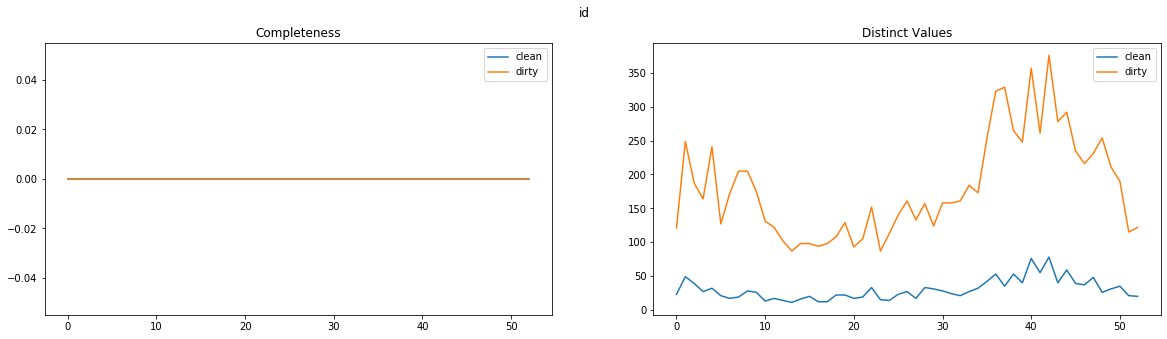

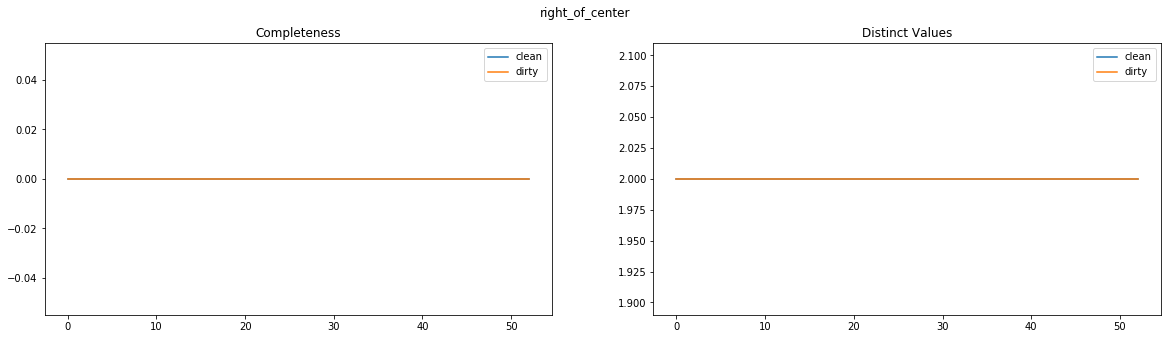

In [10]:
for column in fb_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(fb_clean_completeness_ratio_df.shape[1]), fb_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(fb_dirty_completeness_ratio_df.shape[1]), fb_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(fb_clean_distinct_counts_df.shape[1]), fb_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(fb_dirty_distinct_counts_df.shape[1]), fb_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

### Baseline analysis

In [11]:
print('Clean------------------------------\n',
      flights_clean_completeness_ratio_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      flights_dirty_completeness_ratio_df.mean(axis=1))

Clean------------------------------
 RowId                 0.000000
Source                0.000000
Flight                0.000000
ScheduledDeparture    0.000000
ActualDeparture       0.014968
DepartureGate         0.188292
ScheduledArrival      0.000000
ActualArrival         0.025478
ArrivalGate           0.188728
date                  0.000000
dtype: float64 

Dirty------------------------------
 RowId                 0.000000
Source                0.000000
Flight                0.000000
ScheduledDeparture    0.476794
ActualDeparture       0.190283
DepartureGate         1.503791
ScheduledArrival      0.464570
ActualArrival         0.197457
ArrivalGate           1.488697
date                  0.000000
dtype: float64


For flights: 
- relevant columns: ScheduledDeparture, ActualDeparture, DepartureGate, ScheduledArrival, ActualArrival, ArrivalGate
- if completeness average is larger than 0.2 for those columns than not accepted 

In [12]:
print('Clean------------------------------\n',
      flights_clean_distinct_counts_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      flights_dirty_distinct_counts_df.mean(axis=1))

Clean------------------------------
 RowId                 2381.290323
Source                  37.612903
Flight                  93.483871
ScheduledDeparture      82.935484
ActualDeparture         86.516129
DepartureGate           67.000000
ScheduledArrival        90.354839
ActualArrival           86.322581
ArrivalGate             66.838710
for_key                 82.935484
date                     1.000000
dtype: float64 

Dirty------------------------------
 RowId                 2381.290323
Source                  37.612903
Flight                  93.483871
ScheduledDeparture     508.064516
ActualDeparture        662.903226
DepartureGate          147.225806
ScheduledArrival       588.225806
ActualArrival          728.419355
ArrivalGate            146.225806
date                     1.000000
dtype: float64


For flights: 
- relevant columns: ScheduledDeparture, ActualDeparture, DepartureGate, ScheduledArrival, ActualArrival, ArrivalGate
- if distinct average is larger than 100 for those columns than not accepted 

In [13]:
print('Clean------------------------------\n',
      fb_clean_completeness_ratio_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      fb_dirty_completeness_ratio_df.mean(axis=1))

Clean------------------------------
 line               0.000000
page               0.000000
week               0.000000
num_likes          0.000000
domain             0.000000
outlet             0.172143
title              0.000000
description        0.177228
contenttype        0.200903
image              0.043512
url                0.000000
text               0.217585
id                 0.000000
right_of_center    0.000000
dtype: float64 

Dirty------------------------------
 line               0.000000
page               0.000000
week               0.000000
num_likes          0.000000
domain             0.011395
outlet             3.341735
title              5.402867
description        6.521518
contenttype        6.109355
image              5.378626
url                0.000000
text               0.459134
id                 0.000000
right_of_center    0.000000
dtype: float64


For fb posts: 
- relevant columns: domain, outlet, title, description, contenttype, image, text
- if completeness average is larger than 0.25 for those columns than not accepted 

In [14]:
print('Clean------------------------------\n',
      fb_clean_distinct_counts_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      fb_dirty_distinct_counts_df.mean(axis=1))

Clean------------------------------
 line               29.981132
page                5.037736
week                1.000000
num_likes          13.301887
domain             16.056604
outlet             13.056604
title              25.924528
description        21.603774
contenttype         1.962264
image              24.679245
url                26.037736
text               21.528302
id                 29.981132
right_of_center     2.000000
dtype: float64 

Dirty------------------------------
 line               180.528302
page                 6.547170
week                 1.000000
num_likes           43.811321
domain              73.339623
outlet              16.283019
title               25.924528
description         21.622642
contenttype          4.339623
image               25.471698
url                165.716981
text               103.509434
id                 180.528302
right_of_center      2.000000
dtype: float64


For fb posts: 
- relevant columns: line, num_likes, domain, contenttype, url, text, id
- if distinct average is larger than 30 for those columns than not accepted 

In [ ]:
fb_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_fb)-batch_size):
            row = analysis(i, train_type, clean_fb, dirty_fb, batch_size, 'baseline')
            fb_analysis.loc[counter] = row
            counter = counter + 1


In [ ]:
fb_accuracy = get_accuracy(fb_analysis)

In [ ]:
flights_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_flights)-batch_size):
            row = analysis(i, train_type, clean_flights, dirty_flights, batch_size, 'baseline')
            flights_analysis.loc[counter] = row
            counter = counter + 1

In [ ]:
flights_accuracy = get_accuracy(flights_analysis)

In [ ]:
flights_accuracy

### Batch Accuracy Plots

In [ ]:
plot_batch('facebook', fb_analysis, range(1, 10))

In [ ]:
plot_batch('flights', flights_analysis, range(1, 10))

In [ ]:
fb_accuracy.to_csv('fb_accuracy_exploratory.csv', index = False)

In [ ]:
flights_accuracy.to_csv('flights_accuracy_exploratory.csv', index = False)

In [ ]:
fb_analysis.to_csv('fb_batch_analysis_exploratory.csv', index = False)

In [ ]:
flights_analysis.to_csv('flights_batch_analysis_exploratory.csv', index = False)